<a href="https://colab.research.google.com/github/akhils-codes1/data-preprocessing-and-analysis/blob/main/random_vs_des.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -Uqq fastai
!pip install -Uqq timm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 549.1/549.1 KB 15.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.3/190.3 KB 25.1 MB/s eta 0:00:00


In [2]:
from fastai.vision.all import *
import timm

In [3]:
from google.colab import drive
drive.mount('/content/gdrive/', force_remount=True)

Mounted at /content/gdrive/


In [4]:
!ls /content/gdrive/MyDrive/random_vs_DES/

random_vs_des.ipynb  random_vs_des_png.zip


In [5]:
%cd /content/gdrive/MyDrive/random_vs_DES/

/content/gdrive/MyDrive/random_vs_DES


In [6]:
!ls

random_vs_des.ipynb  random_vs_des_png.zip


In [7]:
!unzip '/content/gdrive/MyDrive/random_vs_DES/random_vs_des_png.zip' -d '/content/gdrive/MyDrive/random_vs_DES/'

Streaming output truncated to the last 5000 lines.
  inflating: /content/gdrive/MyDrive/random_vs_DES/random_vs_des_png/0_2949.png  
  inflating: /content/gdrive/MyDrive/random_vs_DES/random_vs_des_png/0_2951.png  
  inflating: /content/gdrive/MyDrive/random_vs_DES/random_vs_des_png/0_2963.png  
  inflating: /content/gdrive/MyDrive/random_vs_DES/random_vs_des_png/0_2968.png  
  inflating: /content/gdrive/MyDrive/random_vs_DES/random_vs_des_png/0_3034.png  
  inflating: /content/gdrive/MyDrive/random_vs_DES/random_vs_des_png/0_3044.png  
  inflating: /content/gdrive/MyDrive/random_vs_DES/random_vs_des_png/0_3050.png  
  inflating: /content/gdrive/MyDrive/random_vs_DES/random_vs_des_png/0_3055.png  
  inflating: /content/gdrive/MyDrive/random_vs_DES/random_vs_des_png/0_3084.png  
  inflating: /content/gdrive/MyDrive/random_vs_DES/random_vs_des_png/0_3134.png  
  inflating: /content/gdrive/MyDrive/random_vs_DES/random_vs_des_png/0_3283.png  
  inflating: /content/gdrive/MyDrive/random_vs_

In [8]:
path = Path('/content/gdrive/MyDrive/random_vs_DES/random_vs_des_png/')

In [9]:
files = get_image_files(path)
files[0]

Path('/content/gdrive/MyDrive/random_vs_DES/random_vs_des_png/0_1.png')

In [10]:
len(files)

40068

In [11]:
pat = r'^(.*)_\d+.png'

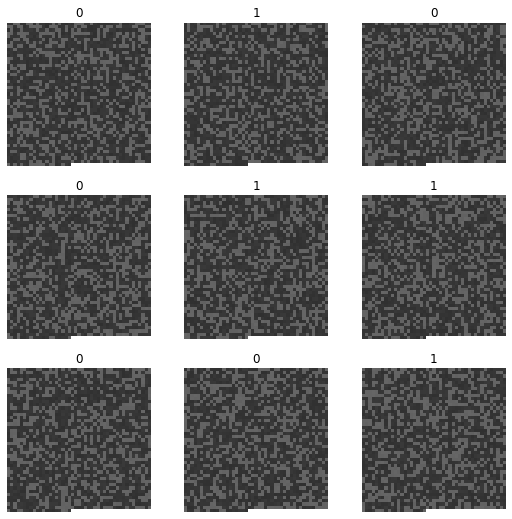

In [12]:
dls1 = ImageDataLoaders.from_name_re(path, files, pat, item_tfms=Resize(45))
dls1.show_batch()

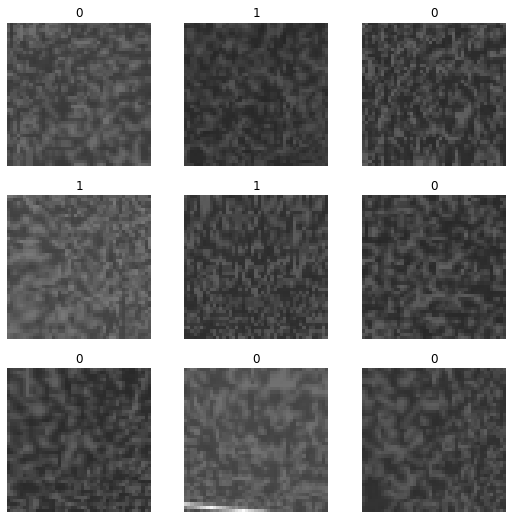

In [13]:
dls2 = ImageDataLoaders.from_name_re(path, files, pat, item_tfms=RandomResizedCrop(45, min_scale=0.5), batch_tfms=aug_transforms())#data augmentation
dls2.show_batch()

In [16]:
def runit(dls,architecture,epochs):
  learn = vision_learner(dls, architecture , metrics=accuracy)
  x = learn.lr_find(suggest_funcs=(slide, valley))
  lr = (x[0]+x[1])/2.0
  learn.fine_tune(epochs,lr)
  learn.show_results()
  return learn

#Densenet121

Downloading: "https://github.com/rwightman/pytorch-image-models/releases/download/v0.1-weights/densenet121_ra-50efcf5c.pth" to /root/.cache/torch/hub/checkpoints/densenet121_ra-50efcf5c.pth


epoch,train_loss,valid_loss,accuracy,time
0,0.751901,0.765590,0.501186,02:32


epoch,train_loss,valid_loss,accuracy,time
0,0.701648,0.697478,0.509297,02:47
1,0.699432,0.702102,0.502059,02:54
2,0.699105,0.697809,0.506427,02:49
3,0.696937,0.704280,0.503557,02:46
4,0.694634,0.702420,0.501061,02:47
5,0.697208,0.702398,0.501685,02:45
6,0.697681,0.707257,0.510421,02:46
7,0.699924,0.706408,0.499938,02:46
8,0.697836,0.717319,0.498690,02:49
9,0.693787,0.724081,0.497816,02:49


Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f3c510e5940>
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/torch/utils/data/dataloader.py", line 1466, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.8/dist-packages/torch/utils/data/dataloader.py", line 1430, in _shutdown_workers
    w.join(timeout=_utils.MP_STATUS_CHECK_INTERVAL)
  File "/usr/lib/python3.8/multiprocessing/process.py", line 149, in join
    res = self._popen.wait(timeout)
  File "/usr/lib/python3.8/multiprocessing/popen_fork.py", line 44, in wait
    if not wait([self.sentinel], timeout):
  File "/usr/lib/python3.8/multiprocessing/connection.py", line 931, in wait
    ready = selector.select(timeout)
  File "/usr/lib/python3.8/selectors.py", line 415, in select
    fd_event_list = self._selector.poll(timeout)
KeyboardInterrupt: 


KeyboardInterrupt: ignored

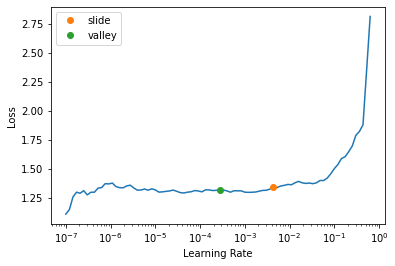

In [15]:
runit(dls1, 'densenet121',60)

epoch,train_loss,valid_loss,accuracy,time
0,0.758342,1.470837,0.501186,02:35


epoch,train_loss,valid_loss,accuracy,time
0,0.702075,0.931796,0.498814,02:49
1,0.713072,0.696064,0.501560,02:50
2,0.715656,0.696415,0.488831,02:51
3,0.716435,0.727023,0.501560,02:50
4,0.713189,0.707999,0.490203,02:52
5,0.706928,0.791672,0.498440,02:50
6,0.703321,0.724935,0.498315,02:50
7,0.699096,0.748684,0.500936,02:51
8,0.696137,0.695331,0.501685,02:50
9,0.696046,0.699065,0.501310,02:49


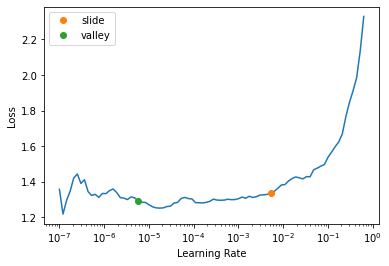

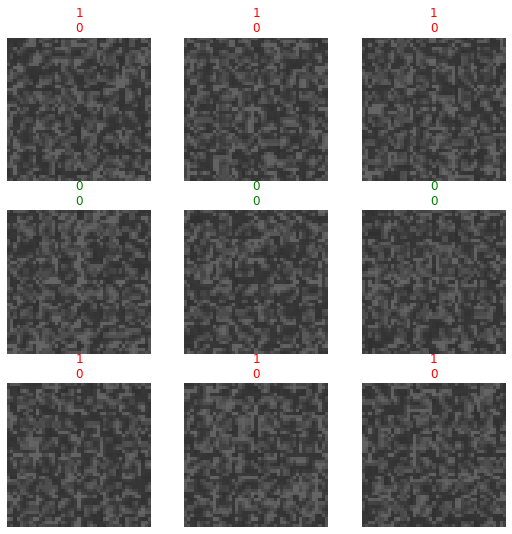

In [17]:
res_2_dense = runit(dls2, 'densenet121' , 10)

#DarkNet

In [ ]:
runit(dls1, 'darknet53',10)

In [ ]:
runit(dls2, 'darknet53',10)

#ConvNext

In [ ]:
runit(dls1, 'convnext_nano',10)

In [ ]:
runit(dls2, 'convnext_nano',10)

#pnasnet5large

In [ ]:
runit(dls1, 'pnasnet5large',10)

In [ ]:
runit(dls2, 'pnasnet5large',10)

#ResNext101_64x4d

In [ ]:
runit(dls1, 'resnext101_64x4d',10)

In [ ]:
runit(dls2, 'resnext101_64x4d',10)

#ResNet152

In [ ]:
runit(dls1, 'resnet152',10)

In [ ]:
runit(dls2, 'resnet152',10)